In [1]:
print("TOWFEKA BENTA TOWHID")
print("ID: 11200120427")

TOWFEKA BENTA TOWHID
ID: 11200120427


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report



In [3]:
df= pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df['Sex'].replace(['M','F'],[0,1],inplace=True)
df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [8]:
pd.value_counts(df['HeartDisease'])

C:\Users\HP\AppData\Local\Temp\ipykernel_19916\3570523971.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['HeartDisease'])


HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

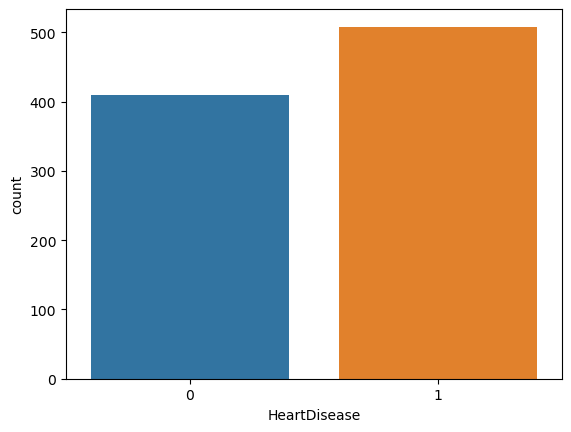

In [9]:
import seaborn as sns

sns.countplot(x='HeartDisease', data=df)


In [10]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y =  df[['HeartDisease']]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
Classifier.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [13]:
Y_pred = Classifier.predict(X_test)

In [14]:

from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy score:{}". format(accuracy_score(Y_pred,y_test)))
print("CONFUSION MATRIX")
print(confusion_matrix(Y_pred,y_test))

Accuracy score:0.6902173913043478
CONFUSION MATRIX
[[48 28]
 [29 79]]


In [15]:
from sklearn.model_selection import cross_val_score

knn_scores = []

for k in range(1,10):
    Knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    score = cross_val_score(Knn_classifier,X_train,y_train,cv=10) 
    knn_scores.append(score.mean())
    


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [16]:
Best_Classifier = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
Best_Classifier.fit(X_train,y_train)
Y_pred = Best_Classifier.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy score:{}". format(accuracy_score(Y_pred,y_test)))
print("CONFUSION MATRIX")
print(confusion_matrix(Y_pred,y_test))

Accuracy score:0.7010869565217391
CONFUSION MATRIX
[[58 36]
 [19 71]]


In [18]:
print('CLASSIFICATION REPORT')
print(classification_report(Y_pred,y_test))


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        94
           1       0.66      0.79      0.72        90

    accuracy                           0.70       184
   macro avg       0.71      0.70      0.70       184
weighted avg       0.71      0.70      0.70       184



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


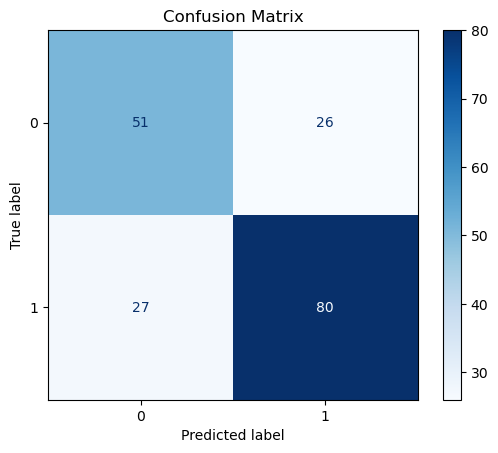

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = KNeighborsClassifier(n_neighbors=7)

# Train the model
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


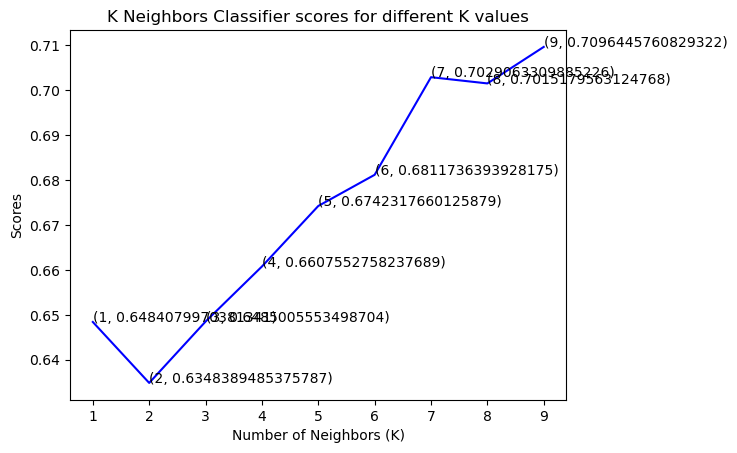

In [20]:
plt.plot([k for k in range(1,10)], knn_scores, color ='blue')

for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
    plt.xticks([i for i in range(1, 10)])
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Scores')
    plt.title('K Neighbors Classifier scores for different K values')